In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features_data = pd.read_csv('Features data set.csv')
sales_data = pd.read_csv('sales data-set.csv')
stores_data = pd.read_csv('stores data-set.csv')
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [2]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [3]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores_data.isna().sum(), sales_data.isna().sum(), features_data.isna().sum()

(Store    0
 Type     0
 Size     0
 dtype: int64,
 Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday       0
 dtype: int64,
 Store              0
 Date               0
 Temperature        0
 Fuel_Price         0
 MarkDown1       4158
 MarkDown2       5269
 MarkDown3       4577
 MarkDown4       4726
 MarkDown5       4140
 CPI              585
 Unemployment     585
 IsHoliday          0
 dtype: int64)

###Cleaning feature dataset

In [5]:
features_data.isna().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [6]:
features_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
features_data.isna().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,585


In [7]:
features_data.groupby('Store')['CPI'].apply(lambda x: x.isna().sum())

,CPI
Store,
1,13
2,13
3,13
4,13
5,13
6,13
7,13
8,13
9,13


In [8]:
features_data['CPI'] = features_data['CPI'].fillna(method='ffill')
features_data.isna().sum()

<ipython-input-8-55d550e21195>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_data['CPI'] = features_data['CPI'].fillna(method='ffill')


,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


In [9]:
features_data['Unemployment'] = features_data['Unemployment'].fillna(method='ffill')
features_data.isna().sum()

<ipython-input-9-a92a9b8e8b95>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_data['Unemployment'] = features_data['Unemployment'].fillna(method='ffill')


,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


###merging the data

In [10]:
sales_data.columns, features_data.columns, stores_data.columns

(Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object'),
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
        'IsHoliday'],
       dtype='object'),
 Index(['Store', 'Type', 'Size'], dtype='object'))

In [11]:
data = pd.merge(sales_data, features_data, on=['Store', 'Date', 'IsHoliday'], how='left')
data = pd.merge(data, stores_data, on='Store', how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [14]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,12,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,19,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,26,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,3,2010


In [15]:
data['Type'] = data['Type'].map({'A': 0, 'B': 1, 'C': 2})
data['Type'].value_counts()

,count
Type,
0,215478
1,163495
2,42597


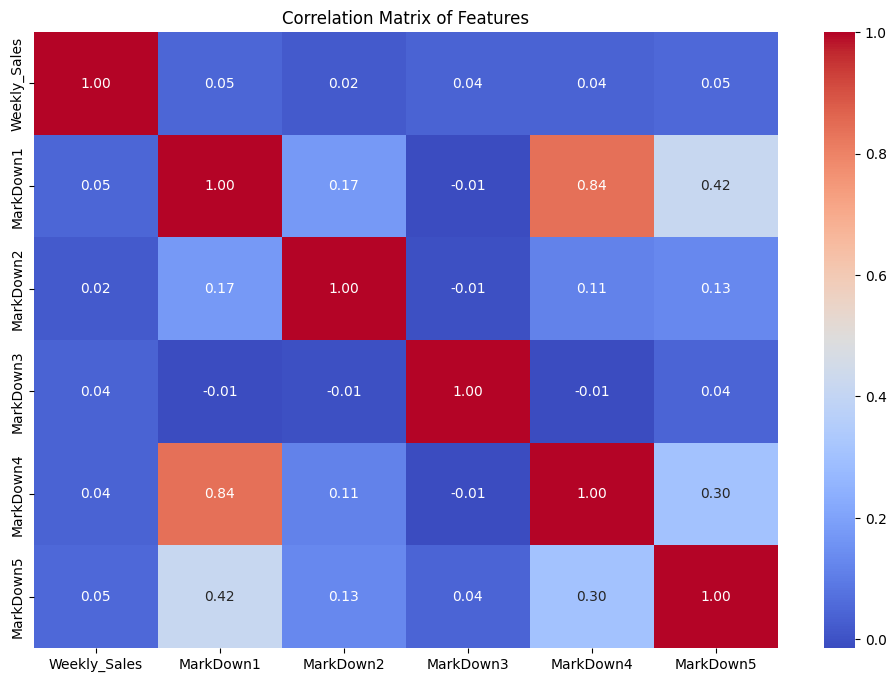

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
holiday_dates = data[data['IsHoliday'] == True][['Day', 'Month', 'Year']]
holiday_dates.head()

,Day,Month,Year
1,12,2,2010
31,10,9,2010
42,26,11,2010
47,31,12,2010
53,11,2,2011


In [18]:
holiday_dates.drop_duplicates(inplace = True)
holiday_dates

,Day,Month,Year
1,12,2,2010
31,10,9,2010
42,26,11,2010
47,31,12,2010
53,11,2,2011
83,9,9,2011
94,25,11,2011
99,30,12,2011
105,10,2,2012
135,7,9,2012


In [19]:
data['date_val'] = data['Year'] * 365 + data['Month'] * 30 + data['Day']
holiday_dates['date_val'] = holiday_dates['Year'] * 365 + holiday_dates['Month'] * 30 + holiday_dates['Day']

min_distance = np.full(len(data), np.inf)

for holiday_date in holiday_dates['date_val']:
    diff = np.abs(data['date_val'] - holiday_date)
    min_distance = np.minimum(min_distance, diff)

data['ProximityToHoliday'] = min_distance

data.drop(columns='date_val', inplace=True)

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,ProximityToHoliday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5,2,2010,7.0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,12,2,2010,0.0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,19,2,2010,7.0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,26,2,2010,14.0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,5,3,2010,23.0


In [20]:
data.drop(columns='IsHoliday', inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,ProximityToHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5,2,2010,7.0
1,1,1,2010-02-12,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,12,2,2010,0.0
2,1,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,19,2,2010,7.0
3,1,1,2010-02-26,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,26,2,2010,14.0
4,1,1,2010-03-05,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,5,3,2010,23.0


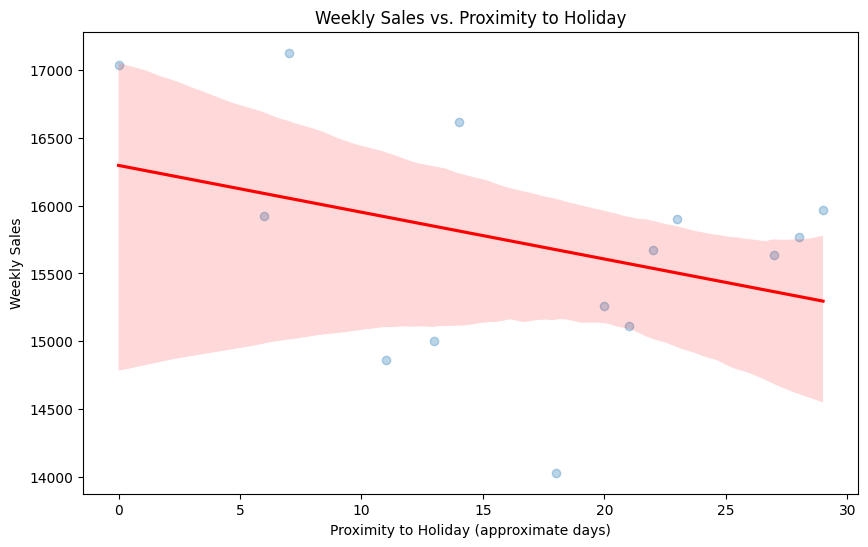

In [22]:
proximity_to_holiday_for_month = data[data['ProximityToHoliday'] < 30 ]
mean_sales = proximity_to_holiday_for_month.groupby('ProximityToHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(x='ProximityToHoliday', y='Weekly_Sales', data=mean_sales,
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Weekly Sales vs. Proximity to Holiday')
plt.xlabel('Proximity to Holiday (approximate days)')
plt.ylabel('Weekly Sales')
plt.show()

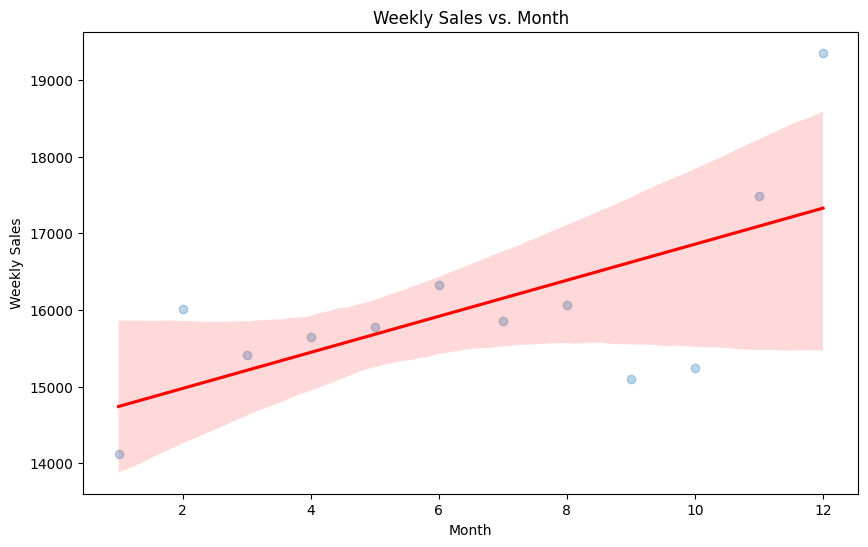

In [23]:
mean_sales_month = data.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(x='Month', y='Weekly_Sales', data=mean_sales_month,
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Weekly Sales vs. Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

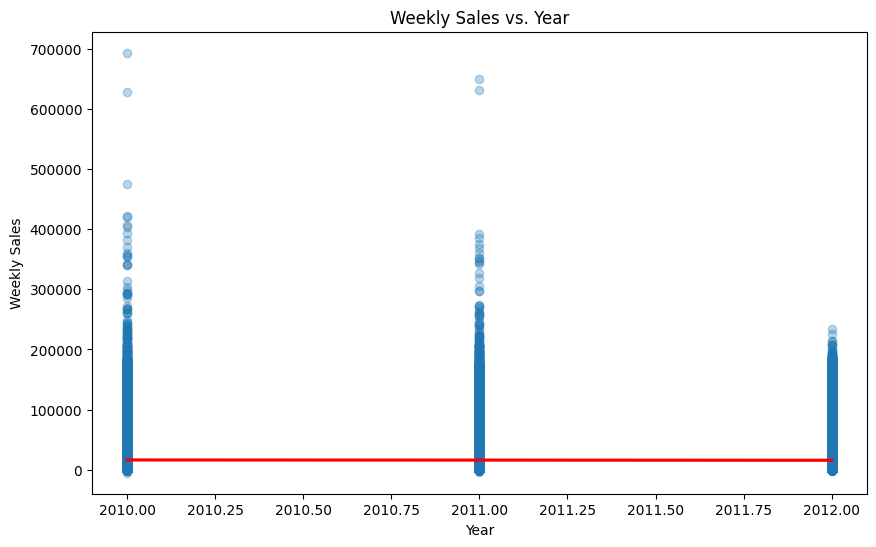

In [ ]:
#mean_sales_Year = data.groupby('Year')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Weekly_Sales', data=data,
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Weekly Sales vs. Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

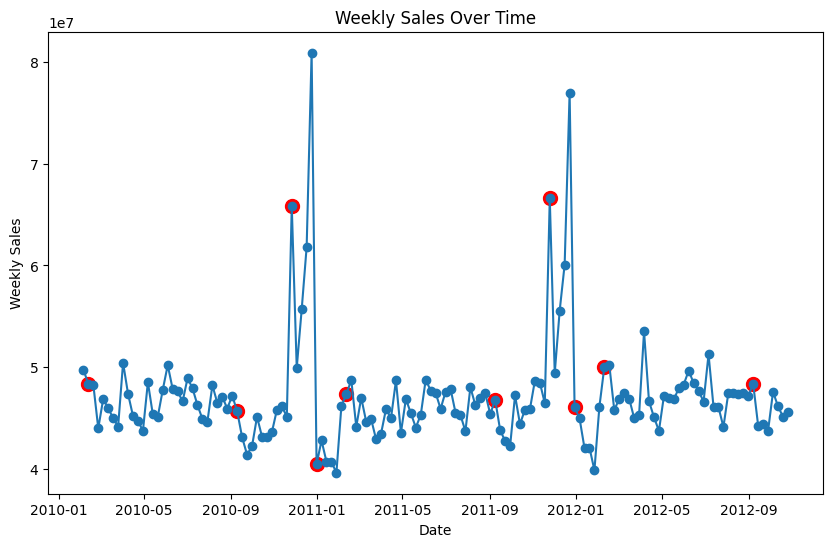

In [40]:
date_and_sales = data.copy()

date_and_sales = date_and_sales[['Day', 'Month', 'Year', 'Weekly_Sales', 'ProximityToHoliday']]

date_and_sales['datval'] = pd.to_datetime(date_and_sales[['Year', 'Month', 'Day']])

date_and_sales.drop(columns=['Day', 'Month', 'Year'], inplace=True)

date_and_sales = date_and_sales.groupby('datval').agg({
    'Weekly_Sales': 'sum',
    'ProximityToHoliday': 'min'
}).reset_index()

holiday_data = date_and_sales[date_and_sales['ProximityToHoliday'] == 0]

plt.figure(figsize=(10, 6))
plt.plot(date_and_sales['datval'], date_and_sales['Weekly_Sales'], marker='o', linestyle='-')

plt.scatter(holiday_data['datval'], holiday_data['Weekly_Sales'], color='red', s=100, label='Holiday')

plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

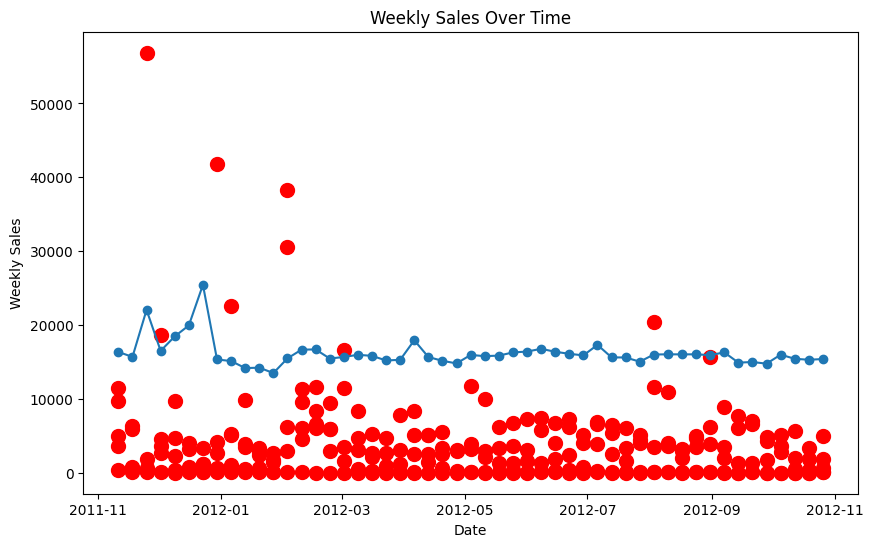

In [30]:
date_and_markDowns = data.copy()

date_and_markDowns = date_and_markDowns[['Day', 'Month', 'Year','Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]


date_and_markDowns['datval'] = pd.to_datetime(date_and_markDowns[['Year', 'Month', 'Day']])

date_and_markDowns = date_and_markDowns[date_and_markDowns['datval']>'2011-11-04']

date_and_markDowns.drop(columns=['Day', 'Month', 'Year'], inplace=True)

date_and_markDowns = date_and_markDowns.groupby('datval').agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(date_and_markDowns['datval'], date_and_markDowns['Weekly_Sales'], marker='o', linestyle='-')

plt.scatter(date_and_markDowns['datval'], date_and_markDowns['MarkDown1'], color='red', s=100, label='Holiday')
plt.scatter(date_and_markDowns['datval'], date_and_markDowns['MarkDown2'], color='red', s=100, label='Holiday')
plt.scatter(date_and_markDowns['datval'], date_and_markDowns['MarkDown3'], color='red', s=100, label='Holiday')
plt.scatter(date_and_markDowns['datval'], date_and_markDowns['MarkDown4'], color='red', s=100, label='Holiday')
plt.scatter(date_and_markDowns['datval'], date_and_markDowns['MarkDown5'], color='red', s=100, label='Holiday')

plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

###the model

In [35]:
data.to_csv('final_data.csv', index=False)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('final_data.csv')

X = data.drop(columns=['Weekly_Sales', 'Date'])
y = data['Weekly_Sales']
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(X, y, data['Date'], test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 3333.26


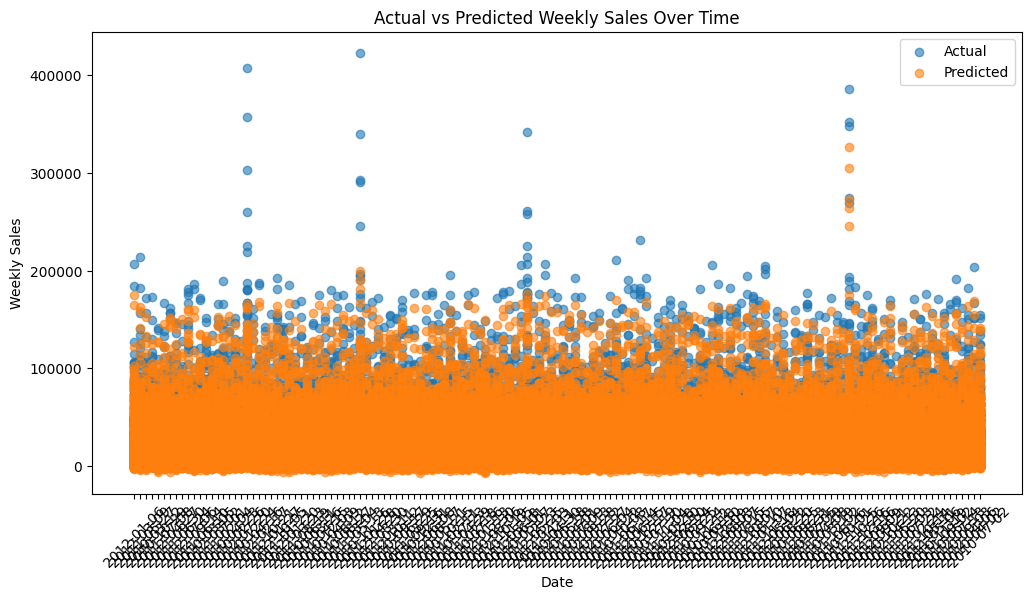

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(date_test, y_test, label='Actual', alpha=0.6)
plt.scatter(date_test, y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [49]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,ProximityToHoliday
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739,15.673131,6.449510,2010.968591,38.576590
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328,8.753549,3.243217,0.796876,30.401799
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,1.000000,1.000000,2010.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,8.000000,4.000000,2010.000000,14.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,16.000000,6.000000,2011.000000,30.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000,23.000000,9.000000,2012.000000,63.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000,31.000000,12.000000,2012.000000,102.000000
